In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
from craftroom import resample
from scipy.interpolate import interp1d


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
muscles_path = '../../stuff/muscles_eg/gj176/'
os.listdir(muscles_path)

['hlsp_muscles_hst_stis_gj176_g230l_v22_component-spec.fits',
 'hlsp_muscles_hst_cos_gj176_g230l_v22_component-spec.fits',
 'hlsp_muscles_model_euv-scaling_gj176_na_v22_component-spec.fits',
 'hlsp_muscles_multi_multi_gj176_broadband_v22_adapt-const-res-sed.fits',
 'hlsp_muscles_cxo_acis_gj176_na_v22_component-spec.fits',
 'hlsp_muscles_hst_cos_gj176_g130m_v22_component-spec.fits',
 'hlsp_muscles_model_apec_gj176_na_v22_component-spec.fits',
 'hlsp_muscles_multi_multi_gj176_broadband_v22_const-res-sed.fits',
 'hlsp_muscles_model_lya-reconstruction_gj176_na_v22_component-spec.fits',
 'hlsp_muscles_hst_stis_gj176_g140m_v22_component-spec.fits',
 'hlsp_muscles_hst_stis_gj176_g430l_v22_component-spec.fits',
 'hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits',
 'hlsp_muscles_multi_multi_gj176_broadband_v22_adapt-var-res-sed.fits',
 'hlsp_muscles_hst_cos_gj176_g160m_v22_component-spec.fits',
 'hlsp_muscles_model_phx_gj176_na_v22_component-spec.fits']

In [3]:
hdul = fits.open(muscles_path+'hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits')

In [4]:
hdul.info()

Filename: ../../stuff/muscles_eg/gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   ()      
  1  SPECTRUM      1 BinTableHDU     59   1196260R x 13C   [D, D, D, D, D, D, I, D, D, J, D, D, D]   
  2  INSTLGND      1 BinTableHDU     32   24R x 5C   [J, 5A, 18A, 6A, 70A]   


In [5]:
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  103 / length of dimension 1                          
NAXIS2  =                   24 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
EXTNO   =                    3                                                  
TTYPE1  = 'BITVALUE'                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'TELESCOPE'                                                           
TFORM2  = '5A      '        

In [6]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'MULTI   '                                                            
INSTRUME= 'MULTI   '                                                            
GRATING = 'MULTI   '                                                            
TELESC00= 'MODEL   '                                                            
INSTRU00= 'PHX     '                                                            
GRATIN00= 'NA      '                                                            
TELESC01= 'MODEL   '                                                            
INSTRU01= 'EUV-SCALING'                                                         
GRATIN01= 'NA      '        

In [7]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   94 / length of dimension 1                          
NAXIS2  =              1196260 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   13 / number of table fields                         
EXTNAME = 'SPECTRUM'                                                            
EXTNO   =                    2                                                  
TDESC1  = 'midpoint of the wavelength bin'                                      
TDESC2  = 'left/blue edge of the wavelength bin'                                
TDESC3  = 'right/red edge of

In [8]:
hdul[2].data

FITS_rec([(      1, 'HST', 'COS', 'G130M', 'hlsp_muscles_hst_cos_gj176_g130m_v22_component-spec.fits'),
          (      2, 'HST', 'COS', 'G160M', 'hlsp_muscles_hst_cos_gj176_g160m_v22_component-spec.fits'),
          (      4, 'HST', 'COS', 'G230L', 'hlsp_muscles_hst_cos_gj176_g230l_v22_component-spec.fits'),
          (      8, 'HST', 'STIS', 'G140M', 'hlsp_muscles_hst_stis_gj176_g140m_v22_component-spec.fits'),
          (     16, 'HST', 'STIS', 'E140M', 'hlsp_muscles_hst_stis_gj176_e140m_v22_component-spec.fits'),
          (     32, 'HST', 'STIS', 'E230M', 'hlsp_muscles_hst_stis_gj176_e230m_v22_component-spec.fits'),
          (     64, 'HST', 'STIS', 'E230H', 'hlsp_muscles_hst_stis_gj176_e230h_v22_component-spec.fits'),
          (    128, 'HST', 'STIS', 'G230L', 'hlsp_muscles_hst_stis_gj176_g230l_v22_component-spec.fits'),
          (    256, 'HST', 'STIS', 'G430L', 'hlsp_muscles_hst_stis_gj176_g430l_v22_component-spec.fits'),
          (    512, 'HST', 'STIS', 'G430M', 'hlsp_mu

In [9]:
test = Table.read('quicksaves/GJ699_sed_test.ecsv')

In [10]:
test.meta

OrderedDict([('AIRORVAC', 'vac'),
             ('APERTURE', '52X0.2'),
             ('DATE-OBS', '2019-06-17T08:52:14'),
             ('DEC_TARG', 4.748102338955),
             ('EXPDEFN', 'MEAN'),
             ('EXPEND', 58651.721284722225),
             ('EXPMAX', 30385.00000045169),
             ('EXPMED', 30385.00000045169),
             ('EXPMIN', 30385.00000045169),
             ('EXPSTART', 58651.36960648148),
             ('EXPTIME', 30385.00000045169),
             ('FLUXMAX', 6.071274585054076e-12),
             ('FLUXMIN', 0.0),
             ('FLUXUNIT', 'erg/s/cm2/ang'),
             ('GRATING', 'NA'),
             ('HLSPACRN', 'MUSCLES'),
             ('HLSPLEAD', 'David J. Wilson'),
             ('HLSPNAME',
              'Measurements of the Ultraviolet Spectral Characteristics of Low-mass Exoplanet Host Stars'),
             ('INSTRUME', 'dem'),
             ('NORMFAC', 1.0),
             ('PROPOSID', 15071),
             ('PR_INV_F', 'Cynthia'),
             ('PR_INV_L

(0, 1000)

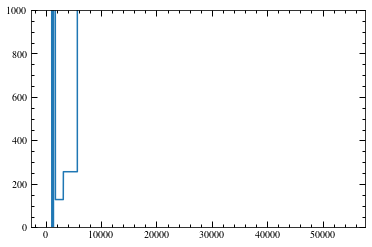

In [11]:
plt.plot(test['WAVELENGTH'], test['INSTRUMENT'])
plt.ylim(0, 1000)
#plt.xlim(0, 2000)

In [12]:
instrument_list = [1, 65536, 8, 8388608, 128, 256, 131072, 8192, 32768, 16777216]

In [13]:
import instruments

In [14]:
for inst in instrument_list:
    print(instruments.getinststr(inst))

hst_cos_g130m
mod_lya_young
hst_sts_g140m
hst_sts_g140l
hst_sts_g230l
hst_sts_g430l
mod_phx_-----
cxo_acs_-----
mod_apc_-----
mod_dem_-----


In [15]:
telescopes = [instruments.getinststr(inst)[0:3] for inst in instrument_list]
instrus = [instruments.getinststr(inst)[4:7] for inst in instrument_list]
gratings = [instruments.getinststr(inst)[8:] for inst in instrument_list]
print(telescopes, instrus, gratings)

['hst', 'mod', 'hst', 'hst', 'hst', 'hst', 'mod', 'cxo', 'mod', 'mod'] ['cos', 'lya', 'sts', 'sts', 'sts', 'sts', 'phx', 'acs', 'apc', 'dem'] ['g130m', 'young', 'g140m', 'g140l', 'g230l', 'g430l', '-----', '-----', '-----', '-----']


In [17]:
for inst in instrument_list:
    inst_str = instruments.getinststr(inst)
    a,b,c = instruments.gethlspname(inst_str)
    print(a,b,c)

HST COS G130M
MODEL LYA-RECONSTRUCTION NA
HST STIS G140M
HST STIS G140L
HST STIS G230L
HST STIS G430L
MODEL PHX NA
CXO ACIS NA
MODEL APEC NA
MODEL DEM NA
